### Student Name: Michael Corrado

In [1]:
#TODO: import the modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, SelectKBest
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

### Step 1 - Load the data

<AxesSubplot:>

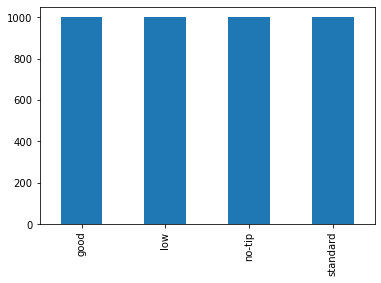

In [2]:
sample_size = 1000
file_path   = '/Users/Michael/Python Anaconda/Machine_Learning_SHU/Module6_featureEng/trip_data.csv' #TODO: provide the file path or URL to the dataset `trip_data.csv`

df = pd.read_csv(file_path)
df = df.groupby('tip').apply(lambda x: x.sample(sample_size))
df = df.sample(frac=1) #shuffle the dataframe rows

#visualize the sample data, which contain 1000 observations from each class
df.tip.value_counts().sort_index().plot.bar()

### Step 2: Create a new feature called `trip_duration`

In [3]:
df.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
tip                                                                   
standard 48952       2.0  2019-12-09 08:46:53   2019-12-09 08:52:57   
low      37863       2.0  2019-12-07 09:25:29   2019-12-07 09:36:26   
no-tip   27262       2.0  2019-12-05 18:39:56   2019-12-05 18:47:20   
standard 56509       2.0  2019-12-10 13:16:20   2019-12-10 13:24:11   
         90555       2.0  2019-12-15 17:45:27   2019-12-15 17:58:53   

                RatecodeID  PULocationID  DOLocationID  passenger_count  \
tip                                                                       
standard 48952         1.0            75            74              5.0   
low      37863         1.0            41           168              1.0   
no-tip   27262         1.0            41            74              6.0   
standard 56509         1.0           243           243              1.0   
         90555         1.0           166           238              1.0   

                trip_distance  fare_amount  extra  mta_tax  tolls_amount  \
tip                                                                        
standard 48952           1.71          7.0    0.0      0.5           0.0   
low      37863           2.72         11.0    0.0      0.5           0.0   
no-tip   27262           0.90          6.5    1.0      0.5           0.0   
standard 56509           1.03          7.0    0.0      0.5           0.0   
         90555           1.49         10.0    0.0      0.5           0.0   

                improvement_surcharge  total_amount  trip_type  \
tip                                                              
standard 48952                    0.3          9.36        1.0   
low      37863                    0.3         13.00        1.0   
no-tip   27262                    0.3          8.30        1.0   
standard 56509                    0.3          9.36        1.0   
         90555                    0.3         13.50        1.0   

                congestion_surcharge       tip  
tip                                             
standard 48952                   0.0  standard  
low      37863                   0.0       low  
no-tip   27262                   0.0    no-tip  
standard 56509                   0.0  standard  
         90555                   0.0  standard

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4000 entries, ('standard', 48952) to ('low', 53132)
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               4000 non-null   float64
 1   lpep_pickup_datetime   4000 non-null   object 
 2   lpep_dropoff_datetime  4000 non-null   object 
 3   RatecodeID             4000 non-null   float64
 4   PULocationID           4000 non-null   int64  
 5   DOLocationID           4000 non-null   int64  
 6   passenger_count        4000 non-null   float64
 7   trip_distance          4000 non-null   float64
 8   fare_amount            4000 non-null   float64
 9   extra                  4000 non-null   float64
 10  mta_tax                4000 non-null   float64
 11  tolls_amount           4000 non-null   float64
 12  improvement_surcharge  4000 non-null   float64
 13  total_amount           4000 non-null   float64
 14  trip_type              4000 

In [5]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,trip_type,congestion_surcharge
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,1.824750,1.041250,104.754500,132.057500,1.320250,2.340045,11.139625,0.443750,0.495250,0.054480,0.29835,14.879320,1.008000,0.534375
std,0.380228,0.401981,69.176593,77.283985,1.001969,1.728439,6.224059,0.628065,0.048508,0.569729,0.02219,7.781543,0.089095,1.088070
min,1.000000,1.000000,3.000000,3.000000,0.000000,0.010000,2.500000,0.000000,0.000000,0.000000,0.00000,3.800000,1.000000,0.000000
25%,2.000000,1.000000,52.000000,65.000000,1.000000,1.090000,6.500000,0.000000,0.500000,0.000000,0.30000,9.360000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,134.000000,1.000000,1.800000,9.500000,0.500000,0.500000,0.000000,0.30000,12.360000,1.000000,0.000000
75%,2.000000,1.000000,152.000000,197.000000,1.000000,3.080000,14.000000,0.500000,0.500000,0.000000,0.30000,18.360000,1.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,6.000000,8.380000,55.000000,3.750000,0.500000,6.120000,0.30000,63.050000,2.000000,2.750000


**Observation**
- The data exploration above helps individuals observing the dataset understand the values more

In [6]:
df['lpep_pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'], format="%Y-%m-%d %H:%M:%S")

In [7]:
df['lpep_dropoff_datetime']=pd.to_datetime(df['lpep_dropoff_datetime'], format="%Y-%m-%d %H:%M:%S")

In [8]:
from datetime import datetime

In [9]:
#Create a new feature called trip_duration and add it to the dataframe

#TODO: Calculate the difference between `lpep_pickup_datetime` and `lpep_dropoff_datetime` in seconds (this should be a positive number).

df['trip_duration'] = df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']#TODO: store the elapsed time (from above) into the dataframe.

#Remove the `lpep_pickup_datetime` and `lpep_dropoff_datetime` from the dataframe.
del df['lpep_dropoff_datetime']
del df['lpep_pickup_datetime']

In [10]:
df.head()

VendorID  RatecodeID  PULocationID  DOLocationID  \
tip                                                                
standard 48952       2.0         1.0            75            74   
low      37863       2.0         1.0            41           168   
no-tip   27262       2.0         1.0            41            74   
standard 56509       2.0         1.0           243           243   
         90555       2.0         1.0           166           238   

                passenger_count  trip_distance  fare_amount  extra  mta_tax  \
tip                                                                           
standard 48952              5.0           1.71          7.0    0.0      0.5   
low      37863              1.0           2.72         11.0    0.0      0.5   
no-tip   27262              6.0           0.90          6.5    1.0      0.5   
standard 56509              1.0           1.03          7.0    0.0      0.5   
         90555              1.0           1.49         10.0    0.0      0.5   

                tolls_amount  improvement_surcharge  total_amount  trip_type  \
tip                                                                            
standard 48952           0.0                    0.3          9.36        1.0   
low      37863           0.0                    0.3         13.00        1.0   
no-tip   27262           0.0                    0.3          8.30        1.0   
standard 56509           0.0                    0.3          9.36        1.0   
         90555           0.0                    0.3         13.50        1.0   

                congestion_surcharge       tip   trip_duration  
tip                                                             
standard 48952                   0.0  standard 0 days 00:06:04  
low      37863                   0.0       low 0 days 00:10:57  
no-tip   27262                   0.0    no-tip 0 days 00:07:24  
standard 56509                   0.0  standard 0 days 00:07:51  
         90555                   0.0  standard 0 days 00:13:26

### Step 3: Encode the labels in the `tip` field.
Use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) in scikit learn.

In [11]:
#Encode the class labels
from sklearn import preprocessing
#TODO: Initialize the `LabelEncoder`
le = preprocessing.LabelEncoder()
#TODO: Fit the `LabelEncoder` to the class labels in the 'tip' field
le.fit(df['tip'])
#TODO: Use the `LabelEncoder` to encode class labels in the 'tip' field.
le.classes_
#TODO: Display the encoded labels
tip = le.transform(df["tip"])
df["imported_tip"] = le.fit_transform(df["tip"])

In [12]:
#assign the input features and the class labels to variables 'X' and 'y' respectively.

X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]#TODO: assign the input features (in the dataframe) to a variable 'X'.
y = df.iloc[:,16]#TODO: assign the encoded labels to a variale 'y'.

In [13]:
X.head()

RatecodeID  PULocationID  DOLocationID  passenger_count  \
tip                                                                       
standard 48952         1.0            75            74              5.0   
low      37863         1.0            41           168              1.0   
no-tip   27262         1.0            41            74              6.0   
standard 56509         1.0           243           243              1.0   
         90555         1.0           166           238              1.0   

                trip_distance  fare_amount  extra  mta_tax  tolls_amount  \
tip                                                                        
standard 48952           1.71          7.0    0.0      0.5           0.0   
low      37863           2.72         11.0    0.0      0.5           0.0   
no-tip   27262           0.90          6.5    1.0      0.5           0.0   
standard 56509           1.03          7.0    0.0      0.5           0.0   
         90555           1.49         10.0    0.0      0.5           0.0   

                improvement_surcharge  total_amount  trip_type  \
tip                                                              
standard 48952                    0.3          9.36        1.0   
low      37863                    0.3         13.00        1.0   
no-tip   27262                    0.3          8.30        1.0   
standard 56509                    0.3          9.36        1.0   
         90555                    0.3         13.50        1.0   

                congestion_surcharge  
tip                                   
standard 48952                   0.0  
low      37863                   0.0  
no-tip   27262                   0.0  
standard 56509                   0.0  
         90555                   0.0

### Step 4: Feature selection

#### Filter Methods

[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection): use [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) to select the seven highest scoring features (i.e. k=7).

In [14]:
#Univariate feature selection using SelectKBest.
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
k_best   = SelectKBest(chi2, #TODO choose either chi2 or f_classif
                     k=5 #TODO: enter the value for k
                    )

k_best   = k_best.fit(X, y)

features = k_best.transform(X)

#TODO: display the names of the selected features below
features.shape
print(features[0:5,:])
from sklearn.feature_selection import SelectKBest
X.columns[k_best.get_support(indices=True)].tolist()

[[ 75.    74.     7.     9.36   0.  ]
 [ 41.   168.    11.    13.     0.  ]
 [ 41.    74.     6.5    8.3    0.  ]
 [243.   243.     7.     9.36   0.  ]
 [166.   238.    10.    13.5    0.  ]]


['PULocationID',
 'DOLocationID',
 'fare_amount',
 'total_amount',
 'congestion_surcharge']

#### Wrapper methods

Identify the top seven features using [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html) and [Recursive feature elimination (RFE)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE).

Here is an example on using [SVMs for classification](https://scikit-learn.org/stable/modules/svm.html#classification) and [RFE](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py) in scikit-learn.

In [15]:

svm_estimator = svm.SVC(kernel='linear') #initialize the SVM estimator

#TODO: Recursive Feature Elimination
rfe = RFE(estimator=svm_estimator, #TODO: provide the SVM estimator 
          verbose=1, 
          n_features_to_select=5#TODO: enter the number of required features
         )

rfe.fit(X, y) #Note: this may take a few minutes to complete

#TODO: display the names of the selected features below
print(rfe)


Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
RFE(estimator=SVC(kernel='linear'), n_features_to_select=5, verbose=1)


In [16]:
X.columns[rfe.get_support(indices=True)].tolist()

['fare_amount',
 'extra',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge']

#### The results
Compare and contrast the selected features from the filter and wrapper methods. 

**TODO: Compare and contrast the results**

- The 5 best columns for k best are PU Location ID, DO location ID, fare_amount, total_amount, and congestion_surcharge. The 5 best columns for RFE are fare_amount, extra, tolls_amount, total_amount, and congestion_surcharge. The methods have 3 of the same columns selected Total_amount, fare_amount, and congestion_surcharge.

### Step 5: Standardize the input features
Use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) in [scikit-learn's preprocessing module](https://scikit-learn.org/stable/modules/preprocessing.html) to scale the input features between 0.1 and 0.9 (i.e. the min and max respectively). 

In [17]:
#Standardize the input features
scaler = MinMaxScaler(feature_range=(0.1,0.9) #TODO: provide the min and max values for the features
                     )

X2 = scaler.fit_transform(X)
X2

array([[0.1       , 0.31984733, 0.31679389, ..., 0.17507173, 0.1       ,
        0.1       ],
       [0.1       , 0.21603053, 0.60381679, ..., 0.22421941, 0.1       ,
        0.1       ],
       [0.1       , 0.21603053, 0.31679389, ..., 0.16075949, 0.1       ,
        0.1       ],
       ...,
       [0.1       , 0.31679389, 0.31679389, ..., 0.1345654 , 0.1       ,
        0.1       ],
       [0.1       , 0.24961832, 0.68625954, ..., 0.22259916, 0.1       ,
        0.1       ],
       [0.1       , 0.31679389, 0.59770992, ..., 0.20801688, 0.1       ,
        0.1       ]])

In [31]:
#TODO: Perform the SelectKBest and Recursive Feature Elimination steps using the standardized data

In [ ]:
#TODO: display the names of the selected features for each method

In [18]:
k_best2   = SelectKBest(chi2, #TODO choose either chi2 or f_classif
                     k=5 #TODO: enter the value for k
                    )

k_best2   = k_best.fit(X2, y)

features2 = k_best2.transform(X2)

#TODO: display the names of the selected features below
features2.shape
print(features2[0:5,:])

[[0.31679389 0.26248507 0.16857143 0.1        0.1       ]
 [0.60381679 0.35902031 0.22952381 0.1        0.1       ]
 [0.31679389 0.18506571 0.16095238 0.31333333 0.1       ]
 [0.83282443 0.19749104 0.16857143 0.1        0.1       ]
 [0.81755725 0.24145759 0.21428571 0.1        0.1       ]]


In [22]:
print(k_best2.get_support())

[False False  True False  True  True  True False False False False False
  True]


In [34]:

svm_estimator2 = svm.SVC(kernel='linear') #initialize the SVM estimator

#TODO: Recursive Feature Elimination
rfe2 = RFE(estimator=svm_estimator2, #TODO: provide the SVM estimator 
          verbose=1, 
          n_features_to_select=5#TODO: enter the number of required features
         )

rfe2.fit(X2, y) #Note: this may take a few minutes to complete

#TODO: display the names of the selected features below
print(rfe2)


Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
RFE(estimator=SVC(kernel='linear'), n_features_to_select=5, verbose=1)


In [35]:
rfe2.support_

array([False, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True])

**K_best2 selected features**
- DOLocationID
- trip_distance
- fare_amount
- extra
- congestion_surcharge

**SVM Estimator selected features**
- trip_distance
- fare_amount
- mta_tax
- total_amount
- congestion_surcharge

#### The results
Compare and contrast the scaled features from the filter and wrapper methods. 

**TODO: Compare and contrast the results**

- The 5 best columns for k best are DOLocationID, trip_distance, fare_amount, extra, and congestion_surcharge. The 5 best columns for RFE are trip_distance, fare_amount,  total_amount, mta_tax, total_amount and congestion_surcharge. The methods have 3 of the same columns selected trip_distance, fare_amount, and congestion_surcharge

### Step 6: Explain the effect of standardizing the data

**TODO: Explain the effect of standardizing the data**
- Standardizing the data helps balance the dataset. This is crucial for dealing with datasets that have different integer values. An example of this would be when dealing with 100 feet and 100 cm. This also helps the machine learning algorithms neutralize any outliers within the dataset.

### Step 7:  Observations about the selected features
Based on your observations about the features, did the algorithm identify meaningful features and did they align with your previous intuition about the data (Recall the data wrangling exercise)? Did it identify any features that you would not have otherwise considered.

**#TODO: Explain your observations.**

- The most important features according to the algorithms being used are features I thought were crucial when using data wrangling techniques. It makes sense that the tip would be greater the longer the distance. This is due to the mileage and time it takes to get to distances farther away. I did not think of a congestion surcharge. This is something I have never had to deal with in life and it is interesting to see its impact on the dataset.
- Overall these models are crucial when dealing with datasets that have a lot of features and need to be cleaned before machine learning algorithms are implemented. These methods will increase accuracy when doing testing.
